In [1]:
import sqlite3
from sqlite3 import Error
import os.path
from os import path

from create_db import create_connection, create_table, clean_column_names
from populate_db import extract_data, insert_records
import query_db as qd
import config
import build_dataset as build

import importlib
import datetime
import re
import numpy as np
import pandas as pd



Bad key "text.kerning_factor" on line 4 in
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score, PredefinedSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve 

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [25]:
importlib.reload(build)
importlib.reload(config)

<module 'config' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Machine Learning/covid_decarceration/files/config.py'>

In [4]:
dataset_1 = pd.read_csv('../data/dataset_main_active1.csv')
#dataset_3 = pd.read_csv('../data/dataset_main_active3.csv')

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21,22,29,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
dataset_1.head(2)

,ID,COMMITMENT_PREFIX,EARLIEST_SENTENCE_EFFECTIVE_DT,MOST_SERIOUS_OFFENSE_CODE,INMATE_COMPUTATION_STATUS_FLAG,END_DATE,PROJ_END_DATE,INMATE_RECORD_STATUS_CODE,INMATE_ADMIN_STATUS_CODE,DATE_OF_LAST_INMATE_MOVEMENT,...,Recidivate_Risk_Level,Needed a check?_x,Recidivate_Risk_Level_Lenient,Recidivate_Risk_Level_Harsh,Primary offense code_y,Description (if needed)_y,Current_Offense_Risk_Level,Needed a check?_y,Current_Offense_Risk_Level_Lenient,Current_Offense_Risk_Level_Harsh
0,4,AA,1983-07-12,SELL SCHEDULE II,EXPIRED,1984-07-11,1984-07-11,INACTIVE,INACTIVE,1984-07-11,...,0.0,NaN,0.0,0.0,SELL SCHEDULE II,Selling drugs on Schedule II - high potential ...,3.0,YES,2.0,4.0
1,6,AA,1973-01-30,WORTHLESS CHECK,EXPIRED,1973-03-28,0001-01-01,INACTIVE,INACTIVE,1975-08-18,...,1.0,NO,1.0,1.0,WORTHLESS CHECK,0,1.0,NO,1.0,1.0


In [6]:
# BINARY TARGET VAR
grouping_target = config.grouping_target
print(grouping_target)
#print(features)
train_data, test_data, validate_data, active_sentences = build.split_and_process(dataset_1,config,grouping_target)


binary
249
Size of active sentences dataset:  32711
Dataset size:  778681


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

Total Number of Unique IDs: 419118
Total Number of IDs in Test Data: 83824
Total Number of IDs in Train Data: 268235
Total Number of IDs in Validate Data: 67059
Do the IDs add up? True
Does Test Represent 20% of the data? False
Test Represents X% of the data: 0.20000095438516122
Does Train+Validate Represent 80% of the data? False
Train+Validate Represents X% of the data: 0.7999990456148388
Does Validate Represent 20% of the Train+Validate Data?: 0.20000059649143737
Does Train Represent 80% of the Train+Validate Data?: 0.7999994035085627


/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Machine Learning/covid_decarceration/files/build_dataset.py:686: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_first_offense.drop_duplicates(inplace=True)


Index(['CONTROL_STATUS', 'OFFENSE_CLEAN', 'Current_Offense_Risk_Level',
       'year_month', 'INFRACTION_PER_SENT', 'misd_count', 'felon_count',
       'sentence_count', 'age_at_sentence', 'unemp_rate', 'ID',
       'COMMITMENT_PREFIX', 'BIRTH_DATE', 'EARLIEST_SENTENCE_EFFECTIVE_DT',
       'INMATE_ADMIN_STATUS_CODE', 'NextPrefix', 'Recidivate_Risk_Level',
       'age_cat', 'age_first_offense', 'juv_first_offense',
       'current_crime_violent'],
      dtype='object')


In [7]:
# Sanity Check
print('Train and Test Check:')
build.sanity_check(train_data,test_data)

print('Train and Validate Check:')
build.sanity_check(train_data,validate_data)

print('Train and Active Check:')
build.sanity_check(train_data,active_sentences)



Train and Test Check:
Success: Features match
Success: No NAs remain
Train and Validate Check:
Success: Features match
Success: No NAs remain
Train and Active Check:
Success: Features match


In [8]:
target = config.target_vars[0]

In [9]:
validate_data.groupby(target).count()

,INFRACTION_PER_SENT,misd_count,felon_count,sentence_count,age_at_sentence,unemp_rate,age_first_offense,juv_first_offense,current_crime_violent,CONTROL_STATUS_HIGH SECURITY/MAX CONTROL HCON,...,age_cat_25-29,age_cat_30-34,age_cat_35-39,age_cat_40-44,age_cat_45-49,age_cat_50-54,age_cat_55-59,age_cat_60-64,age_cat_65 and older,CONTROL_STATUS_OUT OF CELL RESTRICTION OUTC
Recidivate_Risk_Level,,,,,,,,,,,,,,,,,,,,,
0.0,103310,103310,103310,103310,103310,103310,103310,103310,103310,103310,...,103310,103310,103310,103310,103310,103310,103310,103310,103310,103310
1.0,21849,21849,21849,21849,21849,21849,21849,21849,21849,21849,...,21849,21849,21849,21849,21849,21849,21849,21849,21849,21849


In [257]:
#21849 / 103310

In [223]:
#test_data.groupby(target).count()

# Analysis

In [26]:
MODELS = config.MODELS
PARAMS = config.PARAMS
model_key = "LogisticRegression"

model = MODELS[model_key]
params = PARAMS[model_key]        



# Include race/gender/ethnicity or exclude?
config.categorical_vars_to_impute

['CONTROL_STATUS', 'OFFENSE_CLEAN', 'Current_Offense_Risk_Level', 'year_month']

In [27]:
params

{'penalty': ['l2'], 'C': [10], 'max_iter': [100]}

In [28]:
target

'Recidivate_Risk_Level'

In [29]:
#https://stackoverflow.com/questions/31948879/using-explicit-predefined-validation-set-for-grid-search-with-sklearn
ps = PredefinedSplit(test_fold=validate_data[target])


In [30]:
#scorer = make_scorer(precision_score, average = None)
#gs_svc = GridSearchCV(estimator=svc_clf,param_grid=param_grid,scoring=scorer,cv=5)

scoring = {'recall': make_scorer(recall_score, average = 'macro'), 'precision': make_scorer(precision_score, average = 'macro'), 'accuracy': make_scorer(accuracy_score)}
grid_model = GridSearchCV(estimator=model, 
                          param_grid=params, 
                          cv=ps,
                          return_train_score=True,
                          scoring=scoring,
                             refit=False,verbose=10)



In [31]:
grid_model_result = grid_model.fit(train_data.loc[:,train_data.columns!=target],train_data[target])


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] C=10, max_iter=100, penalty=l2 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=100, penalty=l2, accuracy=(train=0.810, test=0.810), precision=(train=0.690, test=0.655), recall=(train=0.519, test=0.516), total=  24.6s
[CV] C=10, max_iter=100, penalty=l2 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.4s remaining:    0.0s
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=100, penalty=l2, accuracy=(train=0.811, test=0.809), precision=(train=0.679, test=0.688), recall=(train=0.514, test=0.514), total=  47.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min finished


In [237]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_max_iter', 'param_penalty', 'params',
       'split0_test_recall', 'split1_test_recall', 'mean_test_recall',
       'std_test_recall', 'rank_test_recall', 'split0_train_recall',
       'split1_train_recall', 'mean_train_recall', 'std_train_recall',
       'split0_test_precision', 'split1_test_precision', 'mean_test_precision',
       'std_test_precision', 'rank_test_precision', 'split0_train_precision',
       'split1_train_precision', 'mean_train_precision', 'std_train_precision',
       'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy',
       'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy'],
      dtype='object')

In [36]:
cv_results = pd.DataFrame(grid_model.cv_results_)


ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
ranked_cv[['param_C','param_max_iter','param_penalty','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]

ranked_cv['classifier'] = model

ranked_cv

best_params = ranked_cv.iloc[0]['params']

In [37]:
best_params

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}

In [242]:
MODELS = config.MODELS
PARAMS = config.PARAMS
model_key = "DecisionTreeClassifier"

model = MODELS[model_key]
params = PARAMS[model_key]        

target = config.target_vars[0]

# Include race/gender/ethnicity or exclude?
config.categorical_vars_to_impute

['CONTROL_STATUS', 'OFFENSE_CLEAN', 'Current_Offense_Risk_Level', 'year_month']

In [244]:
#scorer = make_scorer(precision_score, average = None)
#gs_svc = GridSearchCV(estimator=svc_clf,param_grid=param_grid,scoring=scorer,cv=5)

scoring = {'recall': make_scorer(recall_score, average = 'macro'), 'precision': make_scorer(precision_score, average = 'macro'), 'accuracy': make_scorer(accuracy_score)}
grid_model = GridSearchCV(estimator=model, 
                          param_grid=params, 
                          cv=ps,
                          return_train_score=True,
                          scoring=scoring,
                             refit=False)



In [245]:
grid_model_result = grid_model.fit(train_data.loc[:,train_data.columns!=target],train_data[target])


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

In [247]:
# Dt Results
cv_results = pd.DataFrame(grid_model.cv_results_)
cv_results.columns
ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
ranked_cv[['param_criterion','param_max_depth','param_min_samples_split','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]


,param_criterion,param_max_depth,param_min_samples_split,rank_test_accuracy,mean_test_accuracy,mean_test_recall,mean_test_precision
16,entropy,5,5,13,0.808490,0.502904,0.652937
15,entropy,5,2,14,0.808480,0.502898,0.652425
17,entropy,5,10,15,0.808403,0.502850,0.648495
7,gini,5,5,16,0.808280,0.502979,0.640676
6,gini,5,2,16,0.808280,0.502979,0.640676
8,gini,5,10,18,0.808265,0.502970,0.640061
4,gini,3,5,10,0.808510,0.499970,0.436564
3,gini,3,2,10,0.808510,0.499970,0.436564
5,gini,3,10,10,0.808510,0.499970,0.436564
2,gini,1,10,1,0.808621,0.500000,0.404311


In [275]:
labels = train_data.loc[:,train_data.columns!=target].columns.values
features = train_data.loc[:,train_data.columns!=target].values
target_vals = train_data[target].values

#dt = RandomForestClassifier(random_state=1234,max_depth=None,min_samples_split=5,criterion='gini',n_estimators=1000)
dt = DecisionTreeClassifier(random_state=1234,max_depth=5,min_samples_split=5,criterion='entropy')
model_dt = dt.fit(features,target_vals)



In [276]:
# prediction on test set
x_test = test_data.loc[:,test_data.columns!=target]
y_pred = model_dt.predict(x_test)
y_test = test_data.loc[:,target]


[[128951      0]
 [ 26831      0]]


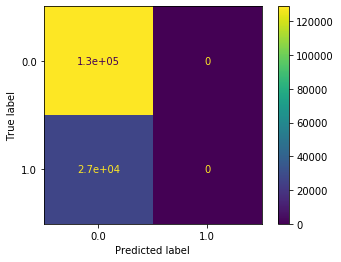

In [277]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve 

plot_confusion_matrix(model_dt,x_test,y_test)
print(metrics.confusion_matrix(y_test, y_pred))

In [248]:
MODELS = config.MODELS
PARAMS = config.PARAMS
model_key = "RandomForestClassifier"

model = MODELS[model_key]
params = PARAMS[model_key]        

target = config.target_vars[0]

# Include race/gender/ethnicity or exclude?
config.categorical_vars_to_impute

['CONTROL_STATUS', 'OFFENSE_CLEAN', 'Current_Offense_Risk_Level', 'year_month']

In [249]:
#scorer = make_scorer(precision_score, average = None)
#gs_svc = GridSearchCV(estimator=svc_clf,param_grid=param_grid,scoring=scorer,cv=5)

#scoring = {'recall': make_scorer(recall_score, average = 'macro'), 'precision': make_scorer(precision_score, average = 'macro'), 'accuracy': make_scorer(accuracy_score)}
scoring = {'recall': make_scorer(recall_score), 'precision': make_scorer(precision_score), 'accuracy': make_scorer(accuracy_score)}

grid_model = GridSearchCV(estimator=model, 
                          param_grid=params, 
                          cv=ps,
                          return_train_score=True,
                          scoring=scoring,
                             refit=False)



In [250]:
rf_grid_model_result = grid_model.fit(train_data.loc[:,train_data.columns!=target],train_data[target])


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/s

In [254]:
cv_results = pd.DataFrame(rf_grid_model_result.cv_results_)

ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
ranked_cv[['param_criterion','param_max_depth','param_min_samples_split','param_n_estimators','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]


,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,rank_test_accuracy,mean_test_accuracy,mean_test_recall,mean_test_precision
0,gini,1,2,100,1,0.808621,0.5,0.404311
29,entropy,1,2,5000,1,0.808621,0.5,0.404311
30,entropy,1,5,100,1,0.808621,0.5,0.404311
31,entropy,1,5,1000,1,0.808621,0.5,0.404311
32,entropy,1,5,5000,1,0.808621,0.5,0.404311
33,entropy,1,10,100,1,0.808621,0.5,0.404311
34,entropy,1,10,1000,1,0.808621,0.5,0.404311
35,entropy,1,10,5000,1,0.808621,0.5,0.404311
36,entropy,3,2,100,1,0.808621,0.5,0.404311
37,entropy,3,2,1000,1,0.808621,0.5,0.404311


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
%matplotlib inline

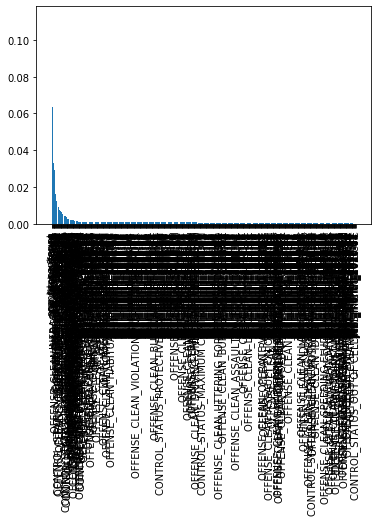

In [15]:
labels = train_data.loc[:,train_data.columns!=target].columns.values
features = train_data.loc[:,train_data.columns!=target].values
target_vals = train_data[target].values

dt = RandomForestClassifier(random_state=1234,max_depth=30,min_samples_split=5,criterion='gini',n_estimators=1000)
model_rf = dt.fit(features,target_vals)

# Get feature importances
importances = model_rf.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [labels[i] for i in indices]

# Plot
plt.figure()
plt.bar(range(features.shape[1]),importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

In [23]:
# prediction on test set
x_test = test_data.loc[:,test_data.columns!=target]
y_pred = model_rf.predict(x_test)
y_test = test_data.loc[:,target]


In [13]:
# Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
from sklearn.metrics import plot_confusion_

ImportError: cannot import name 'plot_confusion_' from 'sklearn.metrics' (/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

[[128934     17]
 [ 26790     41]]


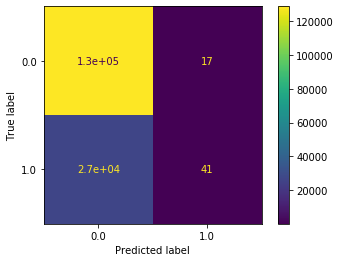

In [24]:
matrix, classification_report, plot_roc_curve, plot_precision_recall_curve 

plot_confusion_matrix(model_rf,x_test,y_test)
print(metrics.confusion_matrix(y_test, y_pred))

In [26]:
names[:20]

['sentence_count',
 'age_first_offense',
 'age_at_sentence',
 'INFRACTION_PER_SENT',
 'misd_count',
 'unemp_rate',
 'felon_count',
 'juv_first_offense',
 'OFFENSE_CLEAN_LARCENY (OVER $200)',
 'Current_Offense_Risk_Level_1.0',
 'age_cat_18-21',
 'OFFENSE_CLEAN_LARCENY',
 'Current_Offense_Risk_Level_3.0',
 'OFFENSE_CLEAN_FELONY B&E',
 'age_cat_Under 18',
 'CONTROL_STATUS_REGULAR POPULATION        RPOP',
 'OFFENSE_CLEAN_MISD B&E',
 'OFFENSE_CLEAN_ROBBERY W/DANGEROUS WEAPON',
 'Current_Offense_Risk_Level_2.0',
 'OFFENSE_CLEAN_OTHER']

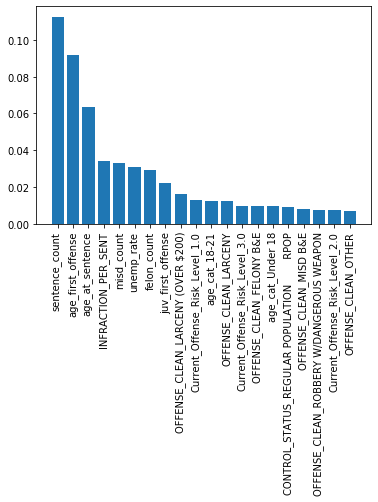

In [16]:
# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [labels[i] for i in indices]

# Plot
plt.figure()
plt.bar(range(20),importances[indices[:20]])
plt.xticks(range(20), names[:20], rotation=90)
plt.show()

In [ ]:
# TRY A SMALL SUBSET WTF IS GOING ON WIHT OUR MODELS ABOVE

In [17]:
# subset
subset_vars = names[:40]

train_subset = train_data.loc[:,subset_vars+[target]]
validate_subset = validate_data.loc[:,subset_vars+[target]]

ps = PredefinedSplit(test_fold=validate_subset[target])



In [50]:
importlib.reload(config)

<module 'config' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Machine Learning/covid_decarceration/files/config.py'>

In [51]:
MODELS = config.MODELS
PARAMS = config.PARAMS
model_key = "RandomForestClassifier"

model = MODELS[model_key]
params = PARAMS[model_key]        

#target = config.target_vars[0]

# Include race/gender/ethnicity or exclude?
config.categorical_vars_to_impute
params

{'criterion': ('gini', 'entropy'),
 'n_estimators': (10, 20, 30, 100, 1000),
 'max_depth': (10, 20, 30, None),
 'min_samples_split': (5, 50, 100)}

In [52]:
#scorer = make_scorer(precision_score, average = None)
#gs_svc = GridSearchCV(estimator=svc_clf,param_grid=param_grid,scoring=scorer,cv=5)

scoring = {'recall': make_scorer(recall_score), 'precision': make_scorer(precision_score), 'accuracy': make_scorer(accuracy_score)}
grid_model = GridSearchCV(estimator=model, 
                          param_grid=params, 
                          cv=ps,
                          return_train_score=True,
                          scoring=scoring,
                             refit=False)



In [53]:
#grid_model_result_dt = grid_model.fit(train_subset.loc[:,train_subset.columns!=target],train_subset[target])
grid_model_result_rf = grid_model.fit(train_subset.loc[:,train_subset.columns!=target],train_subset[target])



/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:

# Dt Results
# cv_results = pd.DataFrame(grid_model_result_dt.cv_results_)
# cv_results.columns
# ranked_cv=cv_results.sort_values(by=['rank_test_recall'])
# ranked_cv[['param_criterion','param_max_depth','param_min_samples_split','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]

# # cv_results = pd.DataFrame(grid_model.cv_results_)

# # ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
# # ranked_cv[['param_C','param_max_iter','param_penalty','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]

cv_results = pd.DataFrame(grid_model_result_rf.cv_results_)

ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
ranked_cv[['param_criterion','param_max_depth','param_min_samples_split','param_n_estimators','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]



#grid_model_result_rf


,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,rank_test_accuracy,mean_test_accuracy,mean_test_recall,mean_test_precision
73,entropy,10,100,100,86,0.808718,0.000857,0.850000
7,gini,10,50,30,68,0.808947,0.002817,0.797619
11,gini,10,100,20,73,0.808891,0.002529,0.781469
72,entropy,10,100,30,85,0.808724,0.001035,0.762626
61,entropy,10,5,20,58,0.809141,0.004701,0.737145
68,entropy,10,50,100,84,0.808748,0.001213,0.734848
63,entropy,10,5,100,72,0.808915,0.002529,0.719958
62,entropy,10,5,30,61,0.809070,0.003852,0.719697
8,gini,10,50,100,78,0.808823,0.002249,0.715062
71,entropy,10,100,20,80,0.808776,0.001765,0.696860


In [16]:
labels = train_data.loc[:,train_data.columns!=target].columns.values
features = train_data.loc[:,train_data.columns!=target].values
target_vals = train_data[target].values

rf = RandomForestClassifier(random_state=1234,max_depth=None,min_samples_split=5,criterion='gini',n_estimators=100)
#rf_highest_precision = RandomForestClassifier(random_state=1234,max_depth=10,min_samples_split=100,criterion='entropy',n_estimators=100)

#dt = DecisionTreeClassifier(random_state=1234,max_depth=5,min_samples_split=5,criterion='entropy')
#dt = LogisticRegression(random_state=1234,C=0.01,max_iter=1000,penalty='l2')


In [17]:
# model_rf_recall = rf_highest_recall.fit(features,target_vals)
# model_rf_precision = rf_highest_precision.fit(features,target_vals)

model_rf_all = rf.fit(features,target_vals)


In [65]:
#test_subset = test_data.loc[:,subset_vars+[target]]
# cv_results = pd.DataFrame(grid_model_result_rf.cv_results_)

# ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
# ranked_cv[['param_criterion','param_max_depth','param_min_samples_split','param_n_estimators','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]


In [18]:
# prediction on test set
# x_test_rf_recall = test_subset.loc[:,test_subset.columns!=target]
# y_pred_rf_recall = model_rf_recall.predict(x_test_rf_recall)
# y_test_rf_recall = test_subset.loc[:,target]

# x_test_rf_precision = test_subset.loc[:,test_subset.columns!=target]
# y_pred_rf_precision = model_rf_precision.predict(x_test_rf_precision)
# y_test_rf_precision = test_subset.loc[:,target]

x_test_rf = test_data.loc[:,test_data.columns!=target]
y_pred_rf = model_rf_all.predict(x_test_rf)
y_test_rf = test_data.loc[:,target]



[[127312   1639]
 [ 25548   1283]]


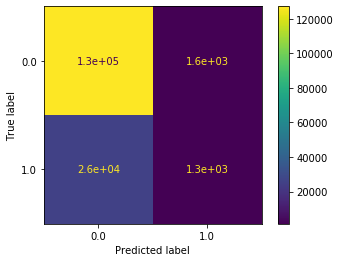

In [20]:
# Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve 

plot_confusion_matrix(model_rf_all,x_test_rf,y_test_rf)
print(metrics.confusion_matrix(y_test_rf, y_pred_rf))


In [22]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(accuracy_score(y_test_rf, y_pred_rf),
                                                                           precision_score(y_test_rf, y_pred_rf),
                                                                           recall_score(y_test_rf, y_pred_rf),
                                                                           f1_score(y_test_rf, y_pred_rf)
                                                                          ))

Accuracy:	0.8254804791310935
Precision:	0.43908281998631077
Recall:		0.04781782266780962
F1 Score:	0.08624340402648473



[[128946      5]
 [ 26815     16]]


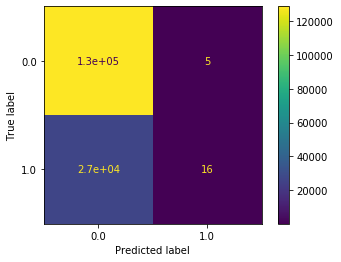

In [68]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve 

plot_confusion_matrix(model_rf_precision,x_test_rf_precision,y_test_rf_precision)
print(metrics.confusion_matrix(y_test_rf_precision, y_pred_rf_precision))


In [39]:
importlib.reload(config)

<module 'config' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Machine Learning/covid_decarceration/files/config.py'>

In [40]:
MODELS = config.MODELS
PARAMS = config.PARAMS
model_key = "GaussianNB"

model = MODELS[model_key]
params = PARAMS[model_key]        

target = config.target_vars[0]

# Include race/gender/ethnicity or exclude?
config.categorical_vars_to_impute

['CONTROL_STATUS', 'OFFENSE_CLEAN', 'Current_Offense_Risk_Level', 'year_month']

In [41]:
#scorer = make_scorer(precision_score, average = None)
#gs_svc = GridSearchCV(estimator=svc_clf,param_grid=param_grid,scoring=scorer,cv=5)

scoring = {'recall': make_scorer(recall_score), 'precision': make_scorer(precision_score), 'accuracy': make_scorer(accuracy_score)}
grid_model = GridSearchCV(estimator=model, 
                          param_grid=params, 
                          cv=ps,
                          return_train_score=True,
                          scoring=scoring,
                             refit=False)



In [42]:
#grid_model_result_dt = grid_model.fit(train_subset.loc[:,train_subset.columns!=target],train_subset[target])
#grid_model_result_nb = grid_model.fit(train_subset.loc[:,train_subset.columns!=target],train_subset[target])
grid_model_result_nb = grid_model.fit(train_data.loc[:,train_data.columns!=target],train_data[target])



In [43]:
cv_results = pd.DataFrame(grid_model_result_nb.cv_results_)

ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
ranked_cv[['param_priors','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]
#cv_results.columns

,param_priors,rank_test_accuracy,mean_test_accuracy,mean_test_recall,mean_test_precision
0,None,1,0.293964,0.911896,0.202096


In [44]:
labels = train_data.loc[:,train_data.columns!=target].columns.values
features = train_data.loc[:,train_data.columns!=target].values
target_vals = train_data[target].values

nb = GaussianNB()

model_nb = nb.fit(features,target_vals)

x_test_nb = test_data.loc[:,test_data.columns!=target]
y_pred_nb = nb.predict(x_test_nb)
y_test_nb = test_data.loc[:,target]



In [54]:
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


In [59]:
df = pd.DataFrame(y_pred_nb)

In [61]:
df[0].unique()

array([1., 0.])

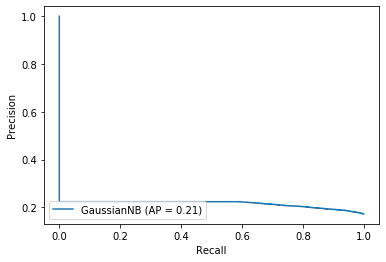

In [45]:
plot_precision_recall_curve(model_nb,x_test_nb,y_test_nb)
plt.show()

In [83]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(accuracy_score(y_test_nb, y_pred_nb),
                                                                           precision_score(y_test_nb, y_pred_nb),
                                                                           recall_score(y_test_nb, y_pred_nb),
                                                                           f1_score(y_test_nb, y_pred_nb)
                                                                          ))

Accuracy:	0.4659074861023738
Precision:	0.20717884785205964
Recall:		0.7432447542022288
F1 Score:	0.324033602521814



[[52638 76313]
 [ 6889 19942]]


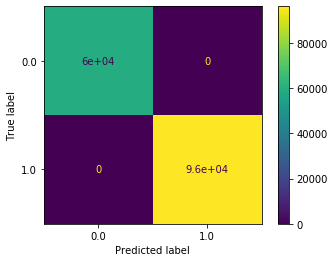

In [81]:
plot_confusion_matrix(nb,x_test_nb,y_pred_nb)
print(metrics.confusion_matrix(y_test_nb, y_pred_nb))


In [84]:
MODELS = config.MODELS
PARAMS = config.PARAMS
model_key = "LinearSVC"

model = MODELS[model_key]
params = PARAMS[model_key]        

target = config.target_vars[0]

# Include race/gender/ethnicity or exclude?
config.categorical_vars_to_impute

['CONTROL_STATUS', 'OFFENSE_CLEAN', 'Current_Offense_Risk_Level', 'year_month']

In [85]:
#scorer = make_scorer(precision_score, average = None)
#gs_svc = GridSearchCV(estimator=svc_clf,param_grid=param_grid,scoring=scorer,cv=5)

scoring = {'recall': make_scorer(recall_score), 'precision': make_scorer(precision_score), 'accuracy': make_scorer(accuracy_score)}
grid_model = GridSearchCV(estimator=model, 
                          param_grid=params, 
                          cv=ps,
                          return_train_score=True,
                          scoring=scoring,
                             refit=False)



In [86]:
grid_model_result_svc = grid_model.fit(train_data.loc[:,train_data.columns!=target],train_data[target])


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear f

In [88]:
cv_results = pd.DataFrame(grid_model_result_svc.cv_results_)

ranked_cv=cv_results.sort_values(by=['rank_test_precision'])
ranked_cv[['params','rank_test_accuracy', 'mean_test_accuracy','mean_test_recall','mean_test_precision']]
#cv_results.columns

,params,rank_test_accuracy,mean_test_accuracy,mean_test_recall,mean_test_precision
0,{'C': 0.01},1,0.809386,0.018371,0.563290
2,{'C': 1},2,0.809161,0.020127,0.537638
1,{'C': 0.1},3,0.809121,0.022037,0.536663
4,{'C': 100},4,0.502885,0.500653,0.513246
3,{'C': 10},5,0.502052,0.505889,0.372763


In [89]:
svc = LinearSVC(random_state=1234,C=100)

model_svc = svc.fit(features,target_vals)

x_test_svc = test_data.loc[:,test_data.columns!=target]
y_pred_svc = svc.predict(x_test_svc)
y_test_svc = test_data.loc[:,target]



/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[128920     31]
 [ 26779     52]]


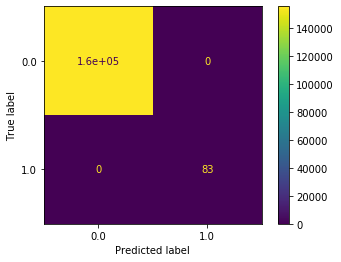

In [90]:
plot_confusion_matrix(svc,x_test_svc,y_pred_svc)
print(metrics.confusion_matrix(y_test_svc, y_pred_svc))


In [93]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(accuracy_score(y_test_svc, y_pred_svc),
                                                                           precision_score(y_test_svc, y_pred_svc),
                                                                           recall_score(y_test_svc, y_pred_svc),
                                                                           f1_score(y_test_svc, y_pred_svc)
                                                                          ))

Accuracy:	0.8279005276604485
Precision:	0.6265060240963856
Recall:		0.0019380567254295405
F1 Score:	0.0038641599167719403



In [ ]:
# THREE CLASS VAR

In [ ]:
# 5 CLASS VAR

In [224]:
#model = LogisticRegression(random_state=1234, solver='lbfgs')

In [225]:
#model.fit(train_data.loc[:,train_data.columns!=target],train_data[target])

In [226]:
#validate_predict = model.predict(validate_data.loc[:,validate_data.columns!=target])

In [227]:
#accuracy = accuracy_score(validate_data[target],validate_predict)


In [228]:
#accuracy

In [184]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(accuracy_score(validate_data[target], validate_predict),
                                                                           precision_score(validate_data[target], validate_predict,average=None),
                                                                           recall_score(validate_data[target], validate_predict,average=None),
                                                                           f1_score(validate_data[target], validate_predict,average=None)
                                                                          ))

Accuracy:	0.8230410917313178
Precision:	[0.82725468 0.15324675 0.11285266 0.14035088 0.         0.        ]
Recall:		[0.9961088  0.00917431 0.00591522 0.00115274 0.         0.        ]
F1 Score:	[0.9038633  0.01731221 0.01124122 0.00228669 0.         0.        ]



/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
#train_data.dtypes

In [196]:
test_data.groupby(target).count()

,INFRACTION_PER_SENT,misd_count,felon_count,sentence_count,age_at_sentence,unemp_rate,age_first_offense,juv_first_offense,current_crime_violent,RACE_ASIAN/ORTL,RACE_BLACK,RACE_INDIAN,RACE_OTHER,RACE_UNKNOWN,RACE_WHITE,GENDER_FEMALE,GENDER_MALE,ETHNICITY_AFRICAN,ETHNICITY_AMERICAN INDIAN,ETHNICITY_ASIAN,ETHNICITY_EUROPEAN/N.AM./AUSTR,ETHNICITY_HISPANIC/LATINO,ETHNICITY_NORDIC/SCANDANAVIAN,ETHNICITY_ORIENTAL,ETHNICITY_OTHER,ETHNICITY_PACIFIC ISLANDER,ETHNICITY_SLAVIC (E. EUROPEAN),ETHNICITY_UNKNOWN,CONTROL_STATUS_HIGH SECURITY/MAX CONTROL HCON,CONTROL_STATUS_INTENSIVE CONTROL ICON,CONTROL_STATUS_MAXIMUM CONTROL MCON,CONTROL_STATUS_MODIFIED HOUSING MODH,CONTROL_STATUS_OUT OF CELL RESTRICTION OUTC,CONTROL_STATUS_PROTECTIVE CONTROL PCON,CONTROL_STATUS_REGULAR POPULATION RPOP,CONTROL_STATUS_REST.HOUS. ADMINISTRATIVE RHAP,CONTROL_STATUS_REST.HOUS. DISCIPLINARY RHDP,CONTROL_STATUS_RESTRCT HOUSNG 4 CTL PURP RHCP,OFFENSE_CLEAN_ARMED ROBBERY,OFFENSE_CLEAN_ASSAULT BY STRANGULATION,OFFENSE_CLEAN_ASSAULT INFLICT SERI BODY INJ,OFFENSE_CLEAN_ASSAULT ISI,OFFENSE_CLEAN_ASSAULT ON FEMALE,OFFENSE_CLEAN_ASSAULT ON OFFICER/ST EMPLOYEE,OFFENSE_CLEAN_ASSAULT ON POLICEMAN,OFFENSE_CLEAN_ASSAULT ON PUBLIC OFFICIAL,OFFENSE_CLEAN_AWDW,OFFENSE_CLEAN_AWDW GOV OFFICERS/EMPLOYEES,OFFENSE_CLEAN_AWDWISI,OFFENSE_CLEAN_AWDWWITKISI,OFFENSE_CLEAN_B & E & L,OFFENSE_CLEAN_B & E VEHICLES,OFFENSE_CLEAN_BURGLARY 1ST DEGREE,OFFENSE_CLEAN_BURGLARY 2ND DEGREE,OFFENSE_CLEAN_CHEAT - PROPERTY/SERVICES,OFFENSE_CLEAN_COMMON LAW FORGERY,OFFENSE_CLEAN_COMMON LAW ROBBERY,OFFENSE_CLEAN_COMMUNICATING THREATS,OFFENSE_CLEAN_CREDIT CARD THEFT,OFFENSE_CLEAN_DAMAGE TO PROPERTY,OFFENSE_CLEAN_DEL/SELL SCHEDULE II,OFFENSE_CLEAN_DISCHG FIREARM-OCC PROPERTY,OFFENSE_CLEAN_DRIV LICENSE PERM RVK,OFFENSE_CLEAN_DRIV LICENSE REVOKED,OFFENSE_CLEAN_DRIVING UNDER INFLUENCE (DUI),OFFENSE_CLEAN_DRUG PARA - USE/POSSESS,OFFENSE_CLEAN_DWI DRIVING WHILE IMPAIRED,OFFENSE_CLEAN_DWI LEVEL 1,OFFENSE_CLEAN_DWI LEVEL 1 AGGRAVATED,OFFENSE_CLEAN_DWI LEVEL 2,OFFENSE_CLEAN_DWI LEVEL 3,OFFENSE_CLEAN_DWI LEVEL 4,OFFENSE_CLEAN_DWI LEVEL 5,OFFENSE_CLEAN_EMBEZZLEMENT,OFFENSE_CLEAN_FAIL TO REGISTER (SEX OFFENDER,OFFENSE_CLEAN_FELONY B&E,OFFENSE_CLEAN_FORGERY,OFFENSE_CLEAN_HABITUAL FELON,OFFENSE_CLEAN_HABITUAL IMPAIRED DRIVING,OFFENSE_CLEAN_HABITUAL MISDEMEANOR ASSAULT,OFFENSE_CLEAN_IDENTITY FRAUD/THEFT,OFFENSE_CLEAN_INDECENT LIBERTY W/CHILD,OFFENSE_CLEAN_INVOLUNTARY MANSLAUGHTER,OFFENSE_CLEAN_KIDNAPPING 2ND DEGREE,OFFENSE_CLEAN_LARCENY,OFFENSE_CLEAN_LARCENY (OVER $200),OFFENSE_CLEAN_LARCENY AFTER B & E,OFFENSE_CLEAN_LARCENY BY SERVANT/EMPLOYEE,OFFENSE_CLEAN_LARCENY FROM PERSON,OFFENSE_CLEAN_LARCENY OF FIREARMS,OFFENSE_CLEAN_LARCENY OF MOTOR VEHICLE,OFFENSE_CLEAN_LARCENY OVER $1000,OFFENSE_CLEAN_MAINT ANY PLACE CONTR SUB,OFFENSE_CLEAN_MANSLAUGHTER,OFFENSE_CLEAN_MISD B&E,OFFENSE_CLEAN_MURDER FIRST DEGREE,OFFENSE_CLEAN_MURDER SECOND DEGREE,OFFENSE_CLEAN_NON-SUPPORT,OFFENSE_CLEAN_OBT PROP BY FALSE PR/CHTS/SER,OFFENSE_CLEAN_OPERATE VEHICLE W/O LICENSE,OFFENSE_CLEAN_OTHER,OFFENSE_CLEAN_POSSESS SCHEDULE I,OFFENSE_CLEAN_POSSESS SCHEDULE II,OFFENSE_CLEAN_POSSESS SCHEDULE VI,OFFENSE_CLEAN_POSSESS WITS SCHEDULE I,OFFENSE_CLEAN_POSSESS WITS SCHEDULE II,OFFENSE_CLEAN_POSSESS WITS SCHEDULE VI,OFFENSE_CLEAN_POSSESSING STOLEN GOODS,OFFENSE_CLEAN_POSSESSION OF FIREARM BY FELON,OFFENSE_CLEAN_RAPE FIRST DEGREE,OFFENSE_CLEAN_RAPE SECOND DEGREE,OFFENSE_CLEAN_RECEIVING STOLEN GOODS,OFFENSE_CLEAN_RECEIVING STOLEN VEHICLE,OFFENSE_CLEAN_RESISTING OFFICER,OFFENSE_CLEAN_ROBBERY W/DANGEROUS WEAPON,OFFENSE_CLEAN_SELL SCHEDULE I,OFFENSE_CLEAN_SELL SCHEDULE II,OFFENSE_CLEAN_SELL SCHEDULE VI,OFFENSE_CLEAN_SEXUAL OFFENSE 2ND DEGREE,OFFENSE_CLEAN_SHOPLIFTING,OFFENSE_CLEAN_SPEED ELUDE ARREST/ATTEMPT/SEC,OFFENSE_CLEAN_SPEEDING ELUDE ARREST OR/ATTEM,OFFENSE_CLEAN_TRAFFICKING SCHEDULE I,OFFENSE_CLEAN_TRAFFICKING SCHEDULE II,OFFENSE_CLEAN_TRESPASS,OFFENSE_CLEAN_UNAUTH USE MOTOR CONVEYANCE,OFFENSE_CLEAN_UTTERING FORGEDPAPER/INST/END,OFFENSE_CLEAN_VIOLATION PROTE

In [186]:
test_predict = model.predict(test_data.loc[:,test_data.columns!=target])

In [187]:
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}\n".format(accuracy_score(test_data[target], test_predict),
                                                                           precision_score(test_data[target], test_predict,average=None),
                                                                           recall_score(test_data[target], test_predict,average=None),
                                                                           f1_score(test_data[target], test_predict,average=None)
                                                                          ))

Accuracy:	0.8275217932752179
Precision:	[0.82893432 0.34375    0.36981132 0.10638298 0.25       0.        ]
Recall:		[9.98557592e-01 5.67375887e-03 1.32647537e-02 5.78235226e-04
 3.95569620e-04 0.00000000e+00]
F1 Score:	[9.05873952e-01 1.11632627e-02 2.56108716e-02 1.15021854e-03
 7.89889415e-04 0.00000000e+00]



/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
